In [ ]:
import json

from fastai2.basics import *
from fastai2.text.all import *

from text_to_img.data.coco import *

In [ ]:
# all_skip

# Train LM
>

## Datasets and DataLoaders

In [ ]:
dsets = get_small_lm_dsets(0.01)
dls = dsets.dataloaders(bs=16, seq_len=72)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [ ]:
dls.show_batch(max_n=2)

,text,text_
0,xxbos a small propeller plane xxunk in a field . xxbos a car in front of a furniture shop with a cow . xxbos a large xxunk xxup tv sits in the corner of a family room . xxbos xxmaj an elephant crossing the road in front of a car . xxbos a xxunk motion picture of a person doing a wheelie on a motorcycle . xxbos xxmaj four giraffes in the,a small propeller plane xxunk in a field . xxbos a car in front of a furniture shop with a cow . xxbos a large xxunk xxup tv sits in the corner of a family room . xxbos xxmaj an elephant crossing the road in front of a car . xxbos a xxunk motion picture of a person doing a wheelie on a motorcycle . xxbos xxmaj four giraffes in the wild
1,full of oranges and apples . xxbos a man rides a motorcycle down an empty street next to xxunk . xxbos a car is parked on xxunk grass with kites overhead . xxbos xxmaj people standing on a xxunk next to a vintage motorcycle . xxbos xxmaj an older woman in a xxunk dress takes a xxunk photo in the mirror . xxbos xxmaj six people in a boat xxunk on a,of oranges and apples . xxbos a man rides a motorcycle down an empty street next to xxunk . xxbos a car is parked on xxunk grass with kites overhead . xxbos xxmaj people standing on a xxunk next to a vintage motorcycle . xxbos xxmaj an older woman in a xxunk dress takes a xxunk photo in the mirror . xxbos xxmaj six people in a boat xxunk on a body


## Learner

In [ ]:
dsets = get_small_lm_dsets()

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [ ]:
%xdel dls
%xdel learn
dls = dsets.dataloaders(bs=64, seq_len=72)
learn = language_model_learner(dls, AWD_LSTM, metrics=[accuracy, Perplexity()], wd=0.1).to_fp16()

(0.09120108485221863, 0.05754399299621582)

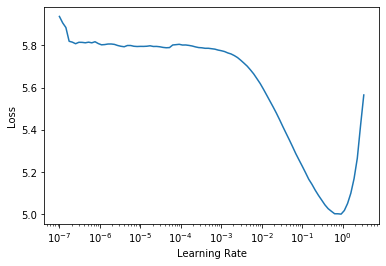

In [ ]:
learn.lr_find()

In [ ]:
learn.freeze()
learn.fit_one_cycle(1, 5e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.164861,2.830277,0.428796,16.950155,03:13


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.859632,2.692055,0.447054,14.761980,03:34
1,2.730793,2.615108,0.455710,13.668696,03:31
2,2.621685,2.537733,0.468089,12.650963,03:33
3,2.521435,2.520133,0.471896,12.430256,03:34


In [ ]:
learn.show_results()

,input,target,pred
0,xxbos a group of people sit at a table laden with food . xxbos a dog xxunk to catch a frisbee while diving into a pool xxbos xxmaj cars try to maneuver into parking spaces along a xxunk packed city street . xxbos a man riding a wave on top of a surfboard . xxbos a long xxunk of train cars is parked in a railway station . xxbos xxmaj meal of,a group of people sit at a table laden with food . xxbos a dog xxunk to catch a frisbee while diving into a pool xxbos xxmaj cars try to maneuver into parking spaces along a xxunk packed city street . xxbos a man riding a wave on top of a surfboard . xxbos a long xxunk of train cars is parked in a railway station . xxbos xxmaj meal of meat,a man of people standing on a table with with food . xxbos a man is on catch a frisbee in standing for the frisbee . a two are to stop a the lot in a street . road street . xxbos a man is a skateboard on top of a surfboard . xxbos a man train of people tracks on on on a train yard . xxbos a two of meat
1,woman is smiling as she surfs through a xxunk wave . xxbos xxmaj two urinals in a green and white tiled bathroom . xxbos a smart device sitting on top of a pillow . xxbos xxmaj man shopping at a grocery store at the produce section . xxbos xxmaj an elephant stands alone in the grass and sunlight . xxbos a man in a gray shirt holds his phone as he sits,is smiling as she surfs through a xxunk wave . xxbos xxmaj two urinals in a green and white tiled bathroom . xxbos a smart device sitting on top of a pillow . xxbos xxmaj man shopping at a grocery store at the produce section . xxbos xxmaj an elephant stands alone in the grass and sunlight . xxbos a man in a gray shirt holds his phone as he sits by,in holding . she holds on the wave wave . xxbos a two people in a bathroom tiled white bathroom bathroom . xxbos a man phone sitting on top of a table . xxbos a two in at a market store with a market stand of xxbos a two old is in in a grass near looks . xxbos a man is a suit shirt and a tennis up he stands on
2,"a xxup beach xxup with xxup tents xxup and xxup flying xxup object xxbos xxmaj the guy and girls are playing a video game . xxbos xxmaj there is a plate with french fries and a sandwich . xxbos a bunch of airplanes lined up in a row at an airport . xxbos a delicious sandwich with meat , cheese , and fresh vegetables . xxbos a woman hugs a gray cat","xxup beach xxup with xxup tents xxup and xxup flying xxup object xxbos xxmaj the guy and girls are playing a video game . xxbos xxmaj there is a plate with french fries and a sandwich . xxbos a bunch of airplanes lined up in a row at an airport . xxbos a delicious sandwich with meat , cheese , and fresh vegetables . xxbos a woman hugs a gray cat to",man tv xxup with xxup people xxup and xxup people xxup kites xxbos a two man is the are playing a video game . xxbos a two is a man of a fries and a sandwich on xxbos a man of people that up at a row xxbos an airport . xxbos a man looking with a and lettuce and and cheese vegetables . xxbos a man is a teddy teddy while
3,a field of grass . xxbos a man and a woman are cutting up cake xxbos a street containing various cars and lampposts at night . xxbos xxmaj many tourists riding on elephants in a river xxbos a vase of white roses in front of a bookcase . xxbos trucks driving on a highway near a car xxbos xxmaj umpire makes a signal during a baseball game . xxbos xxmaj there is,field of grass . xxbos a man and a woman are cutting up cake xxbos a street containing various cars and lampposts at night . xxbos xxmaj many tourists riding on elephants in a river xxbos a vase of white roses in front of a bookcase . xxbos trucks driving on a highway near a car xxbos xxmaj umpire makes a signal during a baseball game . xxbos xxmaj there is a,man with grass . xxbos a man is a woman are sitting a a . a man sign a cars and a . night . xxbos a two people are horses the in a river . a man with flowers flowers sitting a of a window . xxbos a parked down a city 

## Save

In [ ]:
torch.save(learn.model[0].state_dict, './coco_small/lm-1.pt')

In [ ]:
Path('./coco_small/vocab.json').write_text(json.dumps(dsets.vocab))

88801